Author: Md Redwan Hossain
Date : 16/07/2025




Summary of What This Script Does:
Assumes a dataset structure where each subfolder under a root directory represents a different species or class.

Automatically detects objects in each image using a pre-trained model.

Filters detections using a confidence threshold.

Generates annotation files (likely in Pascal VOC format) for images with valid detections.

Stores annotations in an annotations/ subfolder inside each species folder

To run auto-annotation, run all cells below

In [4]:
# Run this cell only once - if you have already installed these packages, do not run it again
# conda install pip
!pip install torchvision
!pip install matplotlib
!pip install labelImg
!pip install ultralytics

# To run auto-annotation, run all cells below

In [5]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt


# Change the following as needed. 
- dataset_path: the main folder containing all the ant species folders. The name of the ant species folder will be used to annotate all images in the folder.  
- model_path: The AI model, change only when you want to use a different AI model ( currently using pretrained yolov12m)  
- confidence_threshold: Increasing the value will result in only auto-annotating confidently annotated objects. 0.7 will annotate objects as ants when the model is 70%+ confident. Increasing the threshold will not make the annotation better; a higher threshold might result in nothing annotated as an ant unless the ants are similar to the training images. 

In [6]:

import os
dataset_path = "./datasets"
#class_mapping in the dataset folder 
model_path = "./models/ant_detector_yolov12m.pt"
confidence_threshold = 0.4

In [7]:
import os
import datetime
from auto_annotation_yolov12 import run_annotation

def main():
    print("=== Ant Auto Annotator (YOLOv12) ===\n")

    print(f"\n[INFO] Using model: {model_path}")
    print(f"[INFO] Confidence threshold: {confidence_threshold}")
    print(f"[INFO] Dataset: {dataset_path}\n")

    class_mapping = run_annotation(
        dataset_root=dataset_path,
        model_path= model_path,
        confidence=confidence_threshold)


    # --- SAVE MAPPING WITH TIMESTAMP ---
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    class_mapping_file = os.path.join(dataset_path, f"class_mapping_{timestamp}.txt")

    with open(class_mapping_file, "w") as f:
        for class_name, class_id in class_mapping.items():
            f.write(f"{class_id}: {class_name}\n")


    print(f"\n[✓] Class Mapping written to '{class_mapping_file}'")
    print("\n[✓] Final Class Mapping Returned:")
    print(class_mapping_file)

if __name__ == "__main__":
    main()


=== Ant Auto Annotator (YOLOv12) ===


[INFO] Using model: ./models/ant_detector_yolov12m.pt
[INFO] Confidence threshold: 0.4
[INFO] Dataset: ./datasets

[✓] CUDA is available. Loading YOLOv12m model on GPU.

[✓] Class Mapping:
  0: Lepisiota_frauenfeldi
  1: sample_ants
  2: Solenopsis_geminata
  3: Wasmannia_auropunctata

[•] Annotating species: Lepisiota_frauenfeldi
[✓] Annotated 20221019_074600.jpg
[✓] Annotated 20221019_083034.jpg
[✓] Annotated IMG_0004.JPG
[✓] Annotated IMG_0040.JPG
[✓] Annotated IMG_0056.JPG
[✓] Annotated IMG_0073.JPG
[✓] Annotated IMG_0088.JPG
[✓] Annotated IMG_0101.JPG
[✓] Annotated IMG_0113.JPG
[✓] Annotated IMG_0124.JPG
[✓] Annotated IMG_0136.JPG
[✓] Annotated IMG_0161.JPG
[✓] Annotated IMG_0178.JPG
[✓] Annotated IMG_0189.JPG
[✓] Annotated IMG_0219.JPG
[✓] Annotated IMG_0238.JPG
[✓] Annotated IMG_0252.JPG
[✓] Annotated IMG_0263.JPG
[✓] Annotated IMG_0277.JPG
[✓] Annotated IMG_0292.JPG
[✓] Annotated IMG_0306.JPG
[✓] Annotated IMG_0317.JPG
[✓] Annotated IMG_03

In [1]:
!labelImg

Image:C:\Users\AntBiosecurity\Ant Annotator\ant_auto-annotation\datasets\sample_ants\79.jpg -> Annotation:C:/Users/AntBiosecurity/Ant Annotator/ant_auto-annotation/datasets/sample_ants/sample_ants_annotations\79.xml
Image:C:\Users\AntBiosecurity\Ant Annotator\ant_auto-annotation\datasets\sample_ants\79.jpg -> Annotation:C:/Users/AntBiosecurity/Ant Annotator/ant_auto-annotation/datasets/sample_ants/sample_ants_annotations\79.txt


# Keybord-shortcuts for labelImg
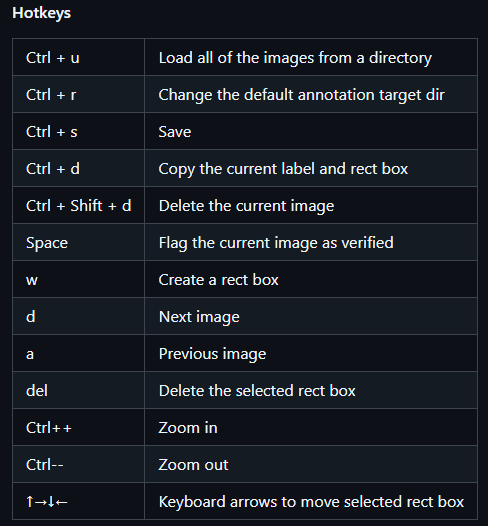


1. when every a annoatation is modified alwasy save the fil in both xml(pascal) and yolo fomate. labelImg only reads from xml fromate but data will be trained on txt (yolo) formate, make suer to save the modified annottaion in yolo formate by clcking on the pascal button and clcik save button when it shows yolo. 


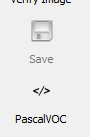



2. If no annotation is showen for images in the labelimg, i is beacsue the program is looking at the wrog folder for annoatation. 
    - To redirect to the annoatation folder press " cltr + r" the change the annotation folder.
    

# To choose customme folder:

In [6]:
    # --- USER CONFIGURABLE OPTIONS ---
    dataset_path = "./datasets"
    #class_mapping in the dataset folder 
    model_path = "./models/ant_detector_yolov12m.pt"
    confidence_threshold = 0.4

In [7]:
    # To choose customme folder:
    # change both of the True to False :
    auto_class_mapping = False 
    annotate_all = False

    # choange both from None to the e.g. formate :
    
    custom_class_mapping = { 'Wasmannia_auropunctata': 3}  # e.g., { "Camponotus": 0,"Solenopsis": 1,"Myrmica": 2 }
    selected_folders = { 'Wasmannia_auropunctata'}  # e.g.,  ["Camponotus", "Solenopsis"]


In [11]:
import os
import datetime
from auto_annotation_yolov12_custom import run_annotation

def main():
    print("=== Ant Auto Annotator (YOLOv12) ===\n")
   

    # --- PRINT INFO ---
    print(f"[INFO] Using model: {model_path}")
    print(f"[INFO] Confidence threshold: {confidence_threshold}")
    print(f"[INFO] Dataset: {dataset_path}")
    print(f"[INFO] Annotate all: {annotate_all}")
    if selected_folders:
        print(f"[INFO] Selected folders: {selected_folders}")
    if not auto_class_mapping:
        print(f"[INFO] Custom class mapping: {custom_class_mapping}")
    print()

    # --- RUN ANNOTATION ---
    class_mapping = run_annotation(
        dataset_root=dataset_path,
        model_path=model_path,
        confidence=confidence_threshold,
        auto_class_mapping=auto_class_mapping,
        custom_class_mapping=custom_class_mapping,
        selected_folders=selected_folders,
        annotate_all=annotate_all
    )

    # --- SAVE MAPPING WITH TIMESTAMP ---
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    class_mapping_file = os.path.join(dataset_path, f"class_mapping_{timestamp}.txt")

    with open(class_mapping_file, "w") as f:
        for class_name, class_id in class_mapping.items():
            f.write(f"{class_id}: {class_name}\n")


    print(f"\n[✓] Class Mapping written to '{class_mapping_file}'")
    print("\n[✓] Final Class Mapping Returned:")
    print(class_mapping_file)

if __name__ == "__main__":
    main()


=== Ant Auto Annotator (YOLOv12) ===

[INFO] Using model: ./models/ant_detector_yolov12m.pt
[INFO] Confidence threshold: 0.4
[INFO] Dataset: ./datasets
[INFO] Annotate all: False
[INFO] Selected folders: {'Wasmannia_auropunctata'}
[INFO] Custom class mapping: {'Wasmannia_auropunctata': 4}

[✓] CUDA is available. Loading YOLOv12m model on GPU.

[✓] Class Mapping:
  4: Wasmannia_auropunctata

[•] Annotating species: Wasmannia_auropunctata
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_040.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_054.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_068.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_082.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_096.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_110.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_124.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_138.tif
[✓] Annotated Wasmannia_auropunctata_Cairns__221021_152.tif
[✓] Annotated Wasma